### Objectifs

1.  Continuer à travailler avec les [regroupements](http://scikit-learn.org/stable/modules/clustering.html) et les [classifications](http://scikit-learn.org/stable/modules/svm.html) algorithmes
2.  Travaux sur les [modèles de régression linéaire](http://scikit-learn.org/stable/modules/linear_model.html)
3.  Commencer à travailler sur les [modèles de réseaux de neurones](http://scikit-learn.org/stable/modules/neural_networks_supervised.html) y compris les perceptrons à une ou plusieurs couches.
4.  Travaux sur les [arbres de décision](https://en.wikipedia.org/wiki/Decision_tree) et les [forêts aléatoires](https://en.wikipedia.org/wiki/Random_forest).
5.  Continuer à travailler sur le [système de recommandation](https://en.wikipedia.org/wiki/Recommender_system)


#### Exercice 3.1 \[★\]

Nous allons maintenant travailler avec la **régression linéaire** (voir [ici](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)).

Voyons quelques programmes simples. Dans les données suivantes, où nous avons quelques exemples de données pour l'équation : *y = x*. Nous allons d'abord entraîner notre modèle de régression linéaire avec un très petit sous-ensemble et tester s'il est capable de prédire les valeurs *y-* pour de nouvelles valeurs *x-*.

In [1]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
numarray = np.array([[0,0], [1,1], [2,2], [3,3], [4,4], [5,5]])

lr = LinearRegression()
lr.fit(numarray[:, 0].reshape(-1, 1), numarray[:, 1].reshape(-1, 1))

#printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(x_predict.reshape(-1, 1))
print(y_predict)

[0.] [[1.]]
[[ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


Ensuite, nous avons quelques exemples de données pour l'équation : *y = x + 1*. Nous allons entraîner notre modèle de régression linéaire à tester s'il est capable de prédire les valeurs *y-* pour les nouvelles valeurs *x-*.

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression

numarray = np.array([[0,1], [1,2], [2,3], [3,4], [4,5], [5,6]])

lr = LinearRegression()
lr.fit(numarray[:, 0].reshape(-1, 1), numarray[:, 1].reshape(-1, 1))

#printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(x_predict.reshape(-1, 1))
print(y_predict)

Mais, et si nous essayions le modèle de régression linéaire pour l'équation : *y = x<sup>2</sup>*. Qu'avez-vous observé avec le code suivant ? A-t-il prédit les valeurs *y-* correctement ?

In [2]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression

numarray = np.array([[0,0], [1,1], [2,4], [3,9], [4,16], [5,25]])

lr = LinearRegression()
lr.fit(numarray[:, 0].reshape(-1, 1), numarray[:, 1].reshape(-1, 1))

#printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(x_predict.reshape(-1, 1))
print(y_predict)

[-3.33333333] [[5.]]
[[26.66666667]
 [31.66666667]
 [36.66666667]
 [41.66666667]
 [46.66666667]]


Maintenant, répétons l'expérience ci-dessus en utilisant des caractéristiques polynomiales. Essayez de changer la valeur de *degree* dans le code donné ci-dessous.



In [8]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

numarray = np.array([[0,0], [1,1], [2,8], [3,27], [4,64], [5,125]])

#using polynomial features
pf = PolynomialFeatures(degree=3)
x_poly = pf.fit_transform(numarray[:, 0].reshape(-1, 1))
lr = LinearRegression()
lr.fit(x_poly, numarray[:, 1].reshape(-1, 1))

#printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(pf.fit_transform(x_predict.reshape(-1, 1)))
print(y_predict)

[7.10542736e-15] [[ 0.00000000e+00 -2.33146835e-15  2.69229083e-15  1.00000000e+00]]
[[ 216.]
 [ 343.]
 [ 512.]
 [ 729.]
 [1000.]]


Essayons maintenant avec une équation polynomiale du troisième ordre (équation cubique).

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

numarray = np.array([[0,0], [1,1], [2,8], [3,27], [4,64], [5,125]])

#using polynomial features
pf = PolynomialFeatures(degree=3)
x_poly = pf.fit_transform(numarray[:, 0].reshape(-1, 1))
lr = LinearRegression()
lr.fit(x_poly, numarray[:, 1].reshape(-1, 1))

#printing coefficients
print(lr.intercept_, lr.coef_)

x_predict = np.array([6, 7, 8, 9, 10])

y_predict = lr.predict(pf.fit_transform(x_predict.reshape(-1, 1)))
print(y_predict)

Nous utiliserons le fichier [population.csv](../../data/population.csv)
Nous allons d'abord tracer cette population pluriannuelle.

<AxesSubplot:xlabel='year', ylabel='population'>

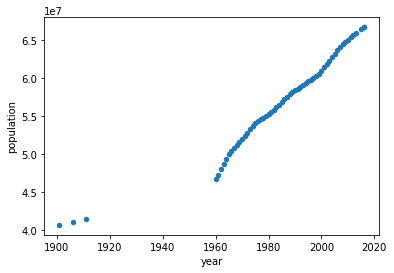

In [5]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
dataset = np.loadtxt("../../data/population.csv",
    dtype={'names': ('year', 'population'), 'formats': ('i4', 'i')},
        skiprows=1, delimiter=",", encoding="UTF-8")

df = pd.DataFrame(dataset)
df.plot(x='year', y='population', kind='scatter')

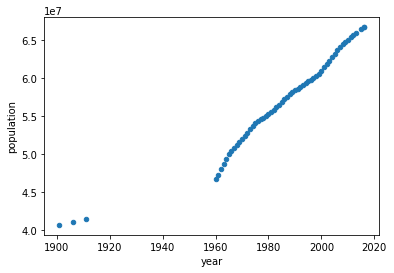

Nous nous concentrerons sur les données à partir de 1960 (pourquoi ?). Notre objectif est d'utiliser
des techniques de régression pour prédire la population. Mais nous ne savons pas comment vérifier. Donc, avec les données disponibles, nous créons deux catégories : les données de formation et les données de test.

Nous continuons maintenant avec les données de population (de TP1 et TP2), que nous divisons en deux : les données d'entraînement et les données de test. Nous allons tracer les valeurs réelles de la population et les valeurs prédites.


[-4.56454352e+08] [[258679.19850773]]


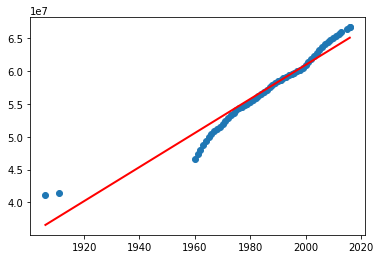

In [12]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.linear_model import LinearRegression
dataset = np.loadtxt("../../data/population.csv",
    dtype={'names': ('year', 'population'), 'formats': ('i4', 'i')},
        skiprows=1, delimiter=",", encoding="UTF-8")

df = pd.DataFrame(dataset[:])

#training data
x_train = df['year'][:].values.reshape(-1, 1)
y_train = df['population'][:].values.reshape(-1, 1)

#training
lr = LinearRegression()
lr.fit(x_train, y_train)

#printing coefficients
print(lr.intercept_, lr.coef_)

#prediction
x_predict = x_train = df['year'][1:].values.reshape(-1, 1)
y_actual = df['population'][1:].values.reshape(-1, 1)
y_predict = lr.predict(x_predict)

plot.scatter(x_predict, y_actual)
plot.plot(x_predict, y_predict, color='red', linewidth=2)
plot.show()

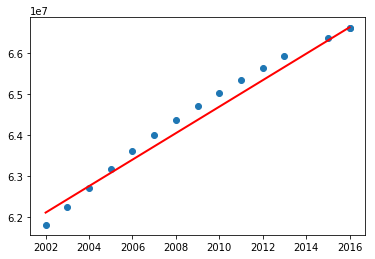

Testez maintenant le programme ci-dessus en incluant les données antérieures à 1960. Qu'avez-vous remarqué ? Vous avez peut-être le graphique suivant.

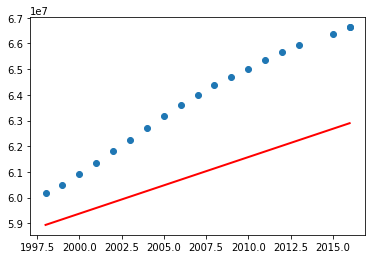

Quelles sont vos observations ? Le programme ci-dessus, qui utilise la régression linéaire, convient donc parfaitement à un sous-ensemble de données. Essayons maintenant avec des **caractéristiques polynomiales** (PolynomialFeatures) de degré 2 (voir [Polynomial Regression: Extending linear models](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)).



[-4.30491266e+09] [[ 0.00000000e+00  4.06776344e+06 -9.42279929e+02]]


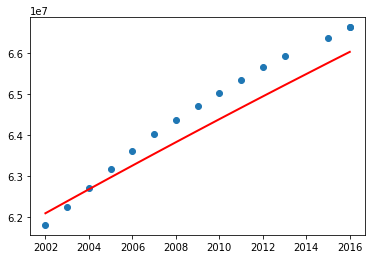

In [13]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
dataset = np.loadtxt("../../data/population.csv",
   dtype={'names': ('year', 'population'), 
              'formats': ('i4', 'i')},
       skiprows=1, delimiter=",", encoding="UTF-8")

df = pd.DataFrame(dataset[4:])

#training data

x_train = df['year'][:50].values.reshape(-1, 1)
y_train = df['population'][:50].values.reshape(-1, 1)

pf = PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(x_train)

#training
lr = LinearRegression()
lr.fit(x_poly, y_train)

#printing coefficients
print(lr.intercept_, lr.coef_)

#prediction
x_predict = x_train = df['year'][41:].values.reshape(-1, 1)
y_actual = df['population'][41:].values.reshape(-1, 1) 
y_predict = lr.predict(pf.fit_transform(x_predict))

plot.scatter(x_predict, y_actual)
plot.plot(x_predict, y_predict, color='red', linewidth=2)
plot.show()

![](../../images/populationpolynomialregression.png)

Avant de passer à la conclusion, examinons l'ensemble des données et voyons.
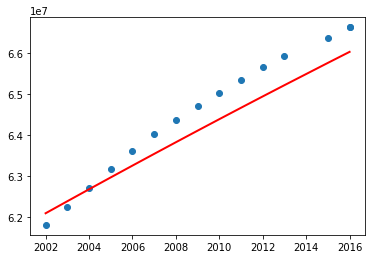

[7.53637479e+09] [[ 0.00000000e+00 -7.89980194e+06  2.08142727e+03]]


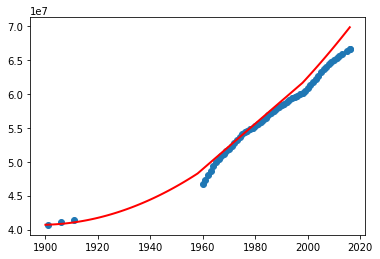

In [14]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
dataset = np.loadtxt("../../data/population.csv",
      dtype={'names': ('year', 'population'), 'formats': ('i4', 'i')},
          skiprows=1, delimiter=",", encoding="UTF-8")

df = pd.DataFrame(dataset)

#training data

x_train = df['year'][:40].values.reshape(-1, 1)
y_train = df['population'][:40].values.reshape(-1, 1)

pf = PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(x_train)

#training
lr = LinearRegression()
lr.fit(x_poly, y_train)

#printing coefficients
print(lr.intercept_, lr.coef_)

#prediction
x_predict = x_train = df['year'][41:].values.reshape(-1, 1)

# Let's add some more years
x_predict = np.append(range(1900, 1959), x_predict)
x_predict = x_predict.reshape(-1, 1)

y_actual = df['population'][41:].values.reshape(-1, 1) 
y_predict = lr.predict(pf.fit_transform(x_predict))

plot.scatter(df['year'], df['population'])
plot.plot(x_predict, y_predict, color='red', linewidth=2)
plot.show()
              
             



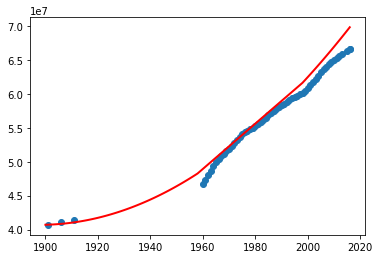

Qu'en pensez-vous ? Pouvons-nous utiliser ce programme pour prévoir les données manquantes (surtout en l'absence d'autres sources d'information externes) ? Essayez le programme ci-dessus à différents degrés.



#### Exercice 3.2 \[★★\]

Les classificateurs sont utiles pour classer notre ensemble de données dans une ou plusieurs classes. Mais contrairement aux algorithmes de regroupement, c'est l'utilisateur qui doit classer les données dans un algorithme de classification. Dans les exercices suivants, nous voyons différents classificateurs, en commençant par le perceptron. Regardez les données d'entrée (*numarray*) et les étiquettes associées (*resultat*). Ici, nous allons étiqueter l'ensemble des données et voir si notre modèle (Perceptron) a bien fonctionné.



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import Perceptron

numarray = np.array([[0,0,0,0], [0,0,0,1], [0,0,1,0], [0,0,1,1],
          [0,1,0,0], [0,1,0,1], [0,1,1,0], [0,1,1,1],
          [1,0,0,0], [1,0,0,1], [1,0,1,0], [1,0,1,1],
          [1,1,0,0], [1,1,0,1], [1,1,1,0], [1,1,1,1]])
result = np.array([0, 0, 0, 0,
          0, 0, 0, 0,
          1, 1, 1, 1,
          1, 1, 1, 1])

perceptron = Perceptron(max_iter=1000)
perceptron.fit(numarray, result)

x_predict = np.array([[0,1,0,1], [1,0,1,1] ])

y_predict = perceptron.predict(x_predict)
print(y_predict)

Nous allons maintenant supprimer certaines données étiquetées/classées et voir les résultats prévus.


In [ ]:
    import numpy as np
    import matplotlib.pyplot as plot
    from sklearn.linear_model import Perceptron

    numarray = np.array([[0,0,0,0], [0,0,0,1], 
          [0,1,0,0], [0,1,1,1],
          [1,0,0,1], [1,0,1,0], 
          [1,1,1,0], [1,1,1,1]])
    result = np.array([0, 0, 
          0, 0, 
          1, 1,
          1, 1])

    perceptron = Perceptron(max_iter=1000)
    perceptron.fit(numarray, result)

    x_predict = np.array([[0,1,0,1], [1,0,1,1], [1,1,0,0], [0,1,0,1]])

    y_predict = perceptron.predict(x_predict)
    print(y_predict)



Maintenant, nous allons essayer un autre classificateur : MLPClassifier



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.neural_network import MLPClassifier

numarray = np.array([[0,0,0,0], [0,0,0,1], 
          [0,1,0,0], [0,1,1,1],
          [1,0,0,1], [1,0,1,0], 
          [1,1,1,0], [1,1,1,1]])

result = np.array([0, 0, 
        0, 0, 
        1, 1,
        1, 1])

mlpclassifier = MLPClassifier(alpha=2, max_iter=1000)
mlpclassifier.fit(numarray, result)

x_predict = np.array([[0,1,0,1], [1,0,1,1], [1,1,0,0], [0,1,0,1]])

y_predict = mlpclassifier.predict(x_predict)
print(y_predict)

Maintenant, nous allons essayer un autre classificateur utilisant des machines à vecteurs de support.


In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn import datasets, svm, metrics

numarray = numarray = np.array([[0,0,0,0], [0,0,0,1], 
          [0,1,0,0], [0,1,1,1],
          [1,0,0,1], [1,0,1,0], 
          [1,1,1,0], [1,1,1,1]])

result = np.array([0, 0, 
        0, 0, 
        1, 1,
        1, 1]) 

svcclassifier = svm.SVC(gamma=0.001, C=100.)
svcclassifier.fit(numarray, result)

x_predict = np.array([[0,1,0,1], [1,0,1,1], [1,1,0,0], [0,1,0,1]])

y_predict = svcclassifier.predict(x_predict)
print(y_predict)



Nous allons maintenant utiliser scikit-learn et les classificateurs vus plus haut pour reconnaître l'écriture manuscrite. Scikit-learn dispose de nombreux ensembles de données. Nous utiliserons un de ces ensembles de données appelé "digits dataset", qui consiste en des images d'écriture manuscrite étiquetées de chiffres. Le programme suivant affichera les étiquettes.

In [ ]:
from sklearn import datasets
import numpy as np
  
digits = datasets.load_digits()
  
print(np.unique(digits.target))

Nous allons maintenant voir le nombre total d'images et le contenu d'une image test.

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plot
  
digits = datasets.load_digits()
  
print("Number of images: ", digits.images.size)
print("Input data: ", digits.images[0])
print("Label:", digits.target[0])
  
plot.imshow(digits.images[0], cmap=plot.cm.gray_r)
plot.show()

Nous allons maintenant utiliser un classificateur de vecteurs de support pour former les données. Nous allons diviser nos données en deux : les données d'entraînement et les données de test. N'oubliez pas que nous disposons déjà d'étiquettes pour l'ensemble des données.

Predicted value:  [4]


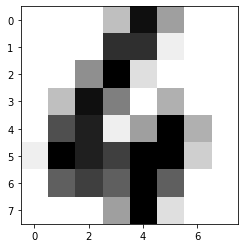

In [17]:
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plot
  
digits = datasets.load_digits()
  
training_images = digits.images[:int(digits.images.shape[0]/2)]
training_images = training_images.reshape(
                 (training_images.shape[0], -1))
  
training_target = digits.target[0:int(digits.target.shape[0]/2)]
  
classifier = svm.SVC(gamma=0.001, C=100.)

#training
classifier.fit(training_images, training_target)
  
#prediction
predict_image = digits.images[int(digits.images.shape[0]/2)+2]
print("Predicted value: ",
      classifier.predict(predict_image.reshape(1,-1)))
  
plot.imshow(predict_image, cmap=plot.cm.gray_r)
plot.show()

![](../../images/scikitlearnfour.png)

Essayons maintenant de prédire les étiquettes restantes et utilisons le rapport de classification pour obtenir la précision de la prédiction.
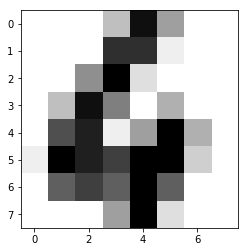

In [20]:
from sklearn import datasets, svm, metrics
import numpy as np
import matplotlib.pyplot as plot
  
digits = datasets.load_digits()
  
training_images = digits.images[:int(digits.images.shape[0]/2)]
training_images = training_images.reshape(
                 (training_images.shape[0], -1))
  
training_target = digits.target[0:int(digits.target.shape[0]/2)]
  
classifier = svm.SVC(gamma=0.001, C=100.)
#training
classifier.fit(training_images, training_target)
  
#prediction
predict_images = digits.images[int(digits.images.shape[0]/2)+1:]
actual_labels = digits.target[int(digits.target.shape[0]/2)+1:]
predicted_labels = classifier.predict(
        predict_images.reshape((predict_images.shape[0], -1)))
  
#classification report
print(metrics.classification_report(actual_labels,predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.96      0.97        91
           2       0.99      0.99      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.98      0.99      0.98        89
           8       0.94      1.00      0.97        87
           9       0.92      0.98      0.95        92

    accuracy                           0.97       898
   macro avg       0.97      0.97      0.97       898
weighted avg       0.97      0.97      0.97       898



Il existe d'autres classificateurs. Nous allons maintenant travailler avec Perceptron (voir [ici](http://scikit-learn.org/stable/modules/linear_model.html#perceptron)) et voir ses performances.

In [ ]:
from sklearn import datasets, metrics
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plot
  
digits = datasets.load_digits()
  
training_images = digits.images[:int(digits.images.shape[0]/2)]
training_images = training_images.reshape(
        (training_images.shape[0], -1))
  
training_target = digits.target[0:int(digits.target.shape[0]/2)]
  
classifier = Perceptron(max_iter=1000)
#training
classifier.fit(training_images, training_target)
  
#prediction
predict_images = digits.images[int(digits.images.shape[0]/2)+1:]
actual_labels = digits.target[int(digits.target.shape[0]/2)+1:]
predicted_labels = classifier.predict(
        predict_images.reshape((predict_images.shape[0], -1)))
  
#classification report
print(metrics.classification_report(
        actual_labels,predicted_labels))

Enfin, nous terminerons le test avec le Perceptron multicouche (voir
[ici](http://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron)).

In [ ]:
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plot
  
digits = datasets.load_digits()
  
training_images = digits.images[:int(digits.images.shape[0]/2)]
training_images = training_images.reshape((training_images.shape[0], -1))
  
training_target = digits.target[0:int(digits.target.shape[0]/2)]
  
classifier = MLPClassifier(alpha=2, max_iter=1000)
#training
classifier.fit(training_images, training_target)
  
#prediction
predict_images = digits.images[int(digits.images.shape[0]/2)+1:]
actual_labels = digits.target[int(digits.target.shape[0]/2)+1:]
predicted_labels = classifier.predict(
         predict_images.reshape((predict_images.shape[0], -1)))
  
#classification report
print(metrics.classification_report(actual_labels,predicted_labels))

Avez-vous essayé de modifier le nombre de couches cachées ?

Quelles sont vos observations après avoir essayé les différents classificateurs ?

Votre prochaine question est de tracer les mesures de confusion pour les trois classificateurs ci-dessus.

#### Exercice 3.3 \[★★\]

Nous allons d'abord construire un classificateur d'arbres de décision en utilisant un exemple très simple. Comme les classificateurs que nous avons vus auparavant, nous essaierons d'abord de faire correspondre nos données et ensuite de prédire une classe pour une valeur jamais vue auparavant.



In [ ]:
from sklearn import tree
data = [[0, 0], 
            [1, 1],
            [1, 0]]

result = [1, 0, 1]
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(data, result)
dtc.predict([[1, 1]])

Notre prochain objectif est de visualiser l'arbre de décision. Regardez le code suivant et voyez comment nous avons donné des noms aux deux colonnes des données ci-dessus. Nous avons également donné des noms aux entrées de données *résultat*, en les appelant *classe1* et *classe2*.

For the next code, you may need to install graphviz and pydotplus

In [ ]:
! pip3 install graphviz pydotplus

Vous pouvez avoir besoin de lancer `sudo apt install graphviz` dans le terminal pour installer l'exécutable graphviz.

In [ ]:
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image, display

data = [[0, 0], 
            [1, 1],
            [1, 0]]
result = [1, 0, 1]
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(data, result)

dot_data = tree.export_graphviz(dtc, out_file=None,
                     feature_names=['column1', 'column2'],
                     filled=True, rounded=True, 
                     class_names = ['class1', 'class2']
                     ) 
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

Prenons maintenant un exemple réaliste. Dans le code suivant, nous considérons 13 photos marquées par un utilisateur comme "Favorite" et "NotFavorite". Pour chaque photo : nous avons quatre informations : la couleur, le tag, la taille (taille moyenne, vignette, etc.) et le mode dans lequel la photo a été prise (portrait ou paysage). Nous allons construire un classificateur d'arbre de décision avec ces données. Nous prévoyons ensuite si notre utilisateur aimera une photographie de nature dont la couleur prédominante est le rouge, dont la taille est celle d'une vignette et qui a été prise en mode portrait.

Dans le code suivant, nous affichons deux valeurs. Nous prédisons si l'utilisateur va préférer la photographie ou non. Nous affichons également l'importance de chacune des caractéristiques : couleur, tag, taille et mode.


In [21]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = [
            ['green', 'nature', 'thumbnail', 'landscape'], 
            ['blue', 'architecture', 'medium', 'portrait'],
            ['blue', 'people', 'medium', 'landscape'],
            ['yellow', 'nature', 'medium', 'portrait'],
            ['green', 'nature', 'thumbnail', 'landscape'],
            ['blue', 'people', 'medium', 'landscape'],
            ['blue', 'nature', 'thumbnail', 'portrait'],
            ['yellow', 'architecture', 'thumbnail', 'landscape'],
            ['blue', 'people', 'medium', 'portrait'],
            ['yellow', 'nature', 'medium', 'landscape'],
            ['yellow', 'people', 'thumbnail', 'portrait'],
            ['blue', 'people', 'medium', 'landscape'],
            ['red', 'architecture', 'thumbnail','landscape']]
result = [
              'Favorite',
              'NotFavorite',
              'Favorite',
              'Favorite',
              'Favorite',
              'Favorite',
              'Favorite',
              'NotFavorite',
              'NotFavorite',
              'Favorite',
              'Favorite',
              'NotFavorite',
              'NotFavorite'
              ]


#creating dataframes
dataframe = pd.DataFrame(data, columns=['color', 'tag', 'size', 'mode'])
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe, resultframe)

#prediction
prediction = dtc.predict([
        [le1.transform(['red'])[0], le2.transform(['nature'])[0],
         le3.transform(['thumbnail'])[0], le4.transform(['portrait'])[0]]])
print(le5.inverse_transform(prediction))
print(dtc.feature_importances_)

['Favorite']
[0.16595745 0.61276596 0.08297872 0.13829787]


Quelles sont vos observations ?



Notre prochain objectif est de visualiser l'arbre de décision ci-dessus. Testez le code ci-dessous. Il est similaire au code que nous avons testé auparavant. Regardez les classes et les fonctionnalités.

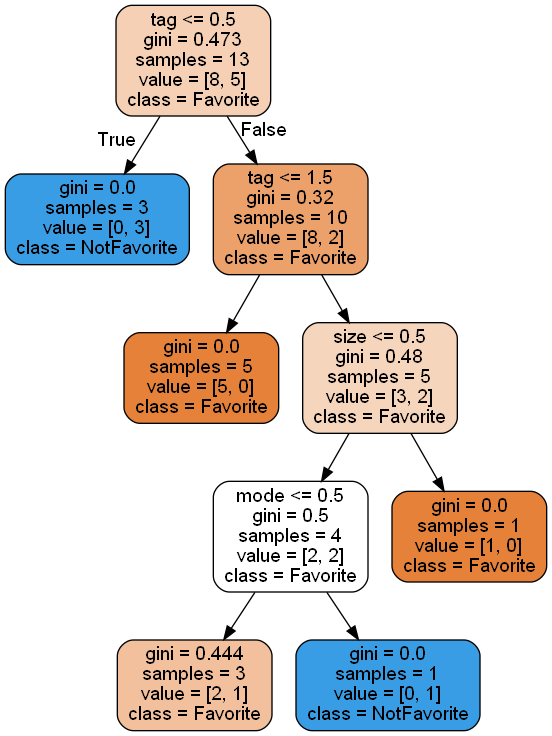

In [1]:
 
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display

data = [
        ['green', 'nature', 'thumbnail', 'landscape'],
        ['blue', 'architecture', 'medium', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['yellow', 'nature', 'medium', 'portrait'],
        ['green', 'nature', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'landscape'],
        ['blue', 'nature', 'thumbnail', 'portrait'],
        ['yellow', 'architecture', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'portrait'],
        ['yellow', 'nature', 'medium', 'landscape'],
        ['yellow', 'people', 'thumbnail', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['red', 'architecture', 'thumbnail','landscape']]
result = [
          'Favorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite'
          ]


#creating dataframes
dataframe = pd.DataFrame(data, columns=['color', 'tag', 'size', 'mode'])
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe, resultframe)

dot_data = tree.export_graphviz(dtc, out_file=None,
      feature_names=dataframe.columns,
      filled=True, rounded=True,
      class_names =
      le5.inverse_transform(
        resultframe.favorite.unique())
     )
graph = graphviz.Source(dot_data)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)



Et si nous avions la possibilité d'avoir plusieurs arbres de décision ? Prévoyons en utilisant un classificateur forestier aléatoire (qui peut être considéré comme une collection d'arbres décisionnels multiples). Vérifiez la valeur prédite ainsi que l'importance des différentes caractéristiques. Notez que nous demandons de créer 10 estimateurs de ce type en utilisant une profondeur maximale de 2 pour chacun des estimateurs.


In [10]:
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display

data = [
            ['green', 'nature', 'thumbnail', 'landscape'], 
            ['blue', 'architecture', 'medium', 'portrait'],
            ['blue', 'people', 'medium', 'landscape'],
            ['yellow', 'nature', 'medium', 'portrait'],
            ['green', 'nature', 'thumbnail', 'landscape'],
            ['blue', 'people', 'medium', 'landscape'],
            ['blue', 'nature', 'thumbnail', 'portrait'],
            ['yellow', 'architecture', 'thumbnail', 'landscape'],
            ['blue', 'people', 'medium', 'portrait'],
            ['yellow', 'nature', 'medium', 'landscape'],
            ['yellow', 'people', 'thumbnail', 'portrait'],
            ['blue', 'people', 'medium', 'landscape'],
            ['red', 'architecture', 'thumbnail','landscape']]
result = [
              'Favorite',
              'NotFavorite',
              'Favorite',
              'Favorite',
              'Favorite',
              'Favorite',
              'Favorite',
              'NotFavorite',
              'NotFavorite',
              'Favorite',
              'Favorite',
              'NotFavorite',
              'NotFavorite'
              ]


#creating dataframes
dataframe = pd.DataFrame(data, columns=['color', 'tag', 'size', 'mode'])
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of random forest classifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=2,
                  random_state=0)
rfc = rfc.fit(dataframe, resultframe.values.ravel())

#prediction
prediction = rfc.predict([
        [le1.transform(['red'])[0], le2.transform(['nature'])[0],
         le3.transform(['thumbnail'])[0], le4.transform(['portrait'])[0]]])
print(le5.inverse_transform(prediction))
print(rfc.feature_importances_)

['Favorite']
[0.24176075 0.50863598 0.10864102 0.14096226]


Enfin, nous visualisons ces estimateurs.

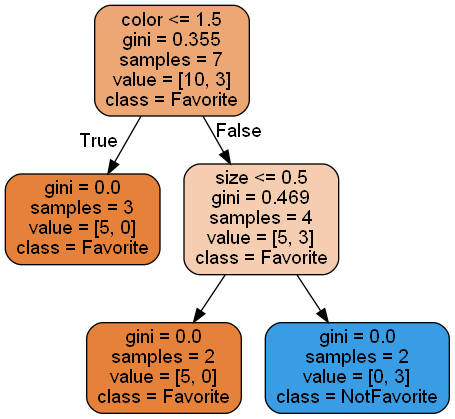

In [8]:
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display

data = [
            ['green', 'nature', 'thumbnail', 'landscape'], 
            ['blue', 'architecture', 'medium', 'portrait'],
            ['blue', 'people', 'medium', 'landscape'],
            ['yellow', 'nature', 'medium', 'portrait'],
            ['green', 'nature', 'thumbnail', 'landscape'],
            ['blue', 'people', 'medium', 'landscape'],
            ['blue', 'nature', 'thumbnail', 'portrait'],
            ['yellow', 'architecture', 'thumbnail', 'landscape'],
            ['blue', 'people', 'medium', 'portrait'],
            ['yellow', 'nature', 'medium', 'landscape'],
            ['yellow', 'people', 'thumbnail', 'portrait'],
            ['blue', 'people', 'medium', 'landscape'],
            ['red', 'architecture', 'thumbnail','landscape']]
result = [
              'Favorite',
              'NotFavorite',
              'Favorite',
              'Favorite',
              'Favorite',
              'Favorite',
              'Favorite',
              'NotFavorite',
              'NotFavorite',
              'Favorite',
              'Favorite',
              'NotFavorite',
              'NotFavorite'
              ]


#creating dataframes
dataframe = pd.DataFrame(data, columns=['color', 'tag', 'size', 'mode'])
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of decision tree classifiers
n_estimators = 10
rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=2,
                             random_state=0, )
rfc = rfc.fit(dataframe, resultframe.values.ravel())

for i in range(n_estimators):
        dot_data = tree.export_graphviz(rfc.estimators_[i], out_file=None,
        feature_names=dataframe.columns,
        filled=True, rounded=True,
        class_names =
         le5.inverse_transform(
           resultframe.favorite.unique())
        ) 
        graph = graphviz.Source(dot_data) 
        pydot_graph = pydotplus.graph_from_dot_data(dot_data)
        img = Image(pydot_graph.create_png())
        display(img)


#### Exercice 3.4 \[★★\]



Nous avons maintenant divisé nos données MNIST (écriture) en deux : les données de formation et les données de test pour la création de modèles de prédiction et nous avons introduit les données de formation complètes dans notre classificateur. Cependant, dans la vie réelle, nous pouvons avoir de nouvelles données à former. Vérifiez le code suivant à l'aide du perceptron et comparez-le avec le code de l'exercice 3.3

In [ ]:
from sklearn import datasets, metrics
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plot
   
digits = datasets.load_digits()
training_size = int(digits.images.shape[0]/2)
   
training_images = digits.images[0:training_size]
training_images = training_images.reshape(
        (training_images.shape[0], -1))
   
training_target = digits.target[0:training_size]
   
classifier = Perceptron(max_iter=1000)
#training
for i in range(training_size):
    training_data = np.array(training_images[i])
    training_data = training_data.reshape(1, -1)
    classifier.partial_fit(training_data,
     [training_target[i]], classes=np.unique(digits.target))

#prediction
predict_images = digits.images[training_size+1:]
actual_labels = digits.target[training_size+1:]
predicted_labels = classifier.predict(
predict_images.reshape((predict_images.shape[0], -1)))
   
#classification report
print(metrics.classification_report(actual_labels,
        predicted_labels))

Cette approche est appelée [online machine training](https://en.wikipedia.org/wiki/Online_machine_learning) (ou
[algorithme d'apprentissage incrémental
(fr)](https://fr.wikipedia.org/wiki/Algorithme_d%27apprentissage_incr%C3%A9mental)).
Avez-vous obtenu une bonne précision ?

Votre prochaine question est de modifier le programme ci-dessus et de tester la formation en ligne avec **MLPClassifier**.

Essayez de modifier (réduire et augmenter) la taille des données de la formation. Que sont
vos observations ?

Cela a-t-il fonctionné ? Essayons maintenant d'obtenir la précision de notre modèle. Est-ce que cela travail pour l'ensemble de nos données de test ?

Quelle est la précision que vous avez obtenue ? Changez maintenant le nombre de neurones dans chaque couche (actuellement, il est fixé à 50 chacun). Essayez également d'augmenter le nombre de couches cachées. Votre précision s'est-elle améliorée ?

